## La función $f(x) = \ln(x^2+1) - e^{0.4 x} \cos(\pi x)$ tiene un número infinito de ceros.

### Determine, dentro de $10^{-6}$, el único cero negativo.

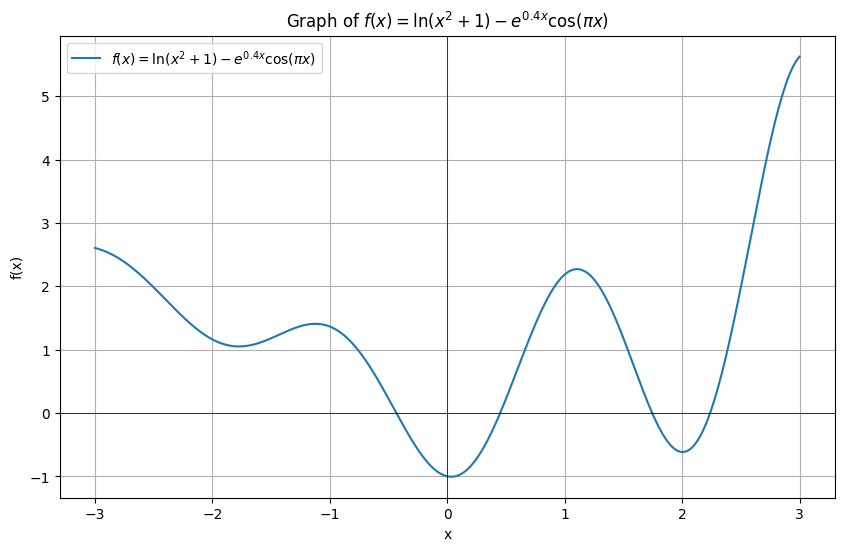

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Se define la función
def f(x):
    return np.log(x**2 + 1) - np.exp(0.4 * x) * np.cos(np.pi * x)

# Genera valores de x
x = np.linspace(-3, 3, 400)
y = f(x)

# Se grafica
plt.figure(figsize=(10, 6))
plt.plot(x, y, label=r'$f(x) = \ln(x^2 + 1) - e^{0.4x} \cos(\pi x)$')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Graph of $f(x) = \ln(x^2 + 1) - e^{0.4x} \cos(\pi x)$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()


In [6]:
import numpy as np

# Define la función y su derivada
def funcion(x):
    return np.log(x**2 + 1) - np.exp(0.4 * x) * np.cos(np.pi * x)

def derivada_funcion(x):
    return (2 * x / (x**2 + 1)) - (0.4 * np.exp(0.4 * x) * np.cos(np.pi * x)) + (np.pi * np.exp(0.4 * x) * np.sin(np.pi * x))

# Implementa el método de Newton
def metodo_newton(funcion, derivada_funcion, x0, tol=1e-6, max_iter=1000):
    x = x0
    for _ in range(max_iter):
        fx = funcion(x)
        dfx = derivada_funcion(x)
        if dfx == 0:
            return None  # La derivada es cero, no se encontró solución
        x_nuevo = x - fx / dfx
        if abs(x_nuevo - x) < tol:
            return x_nuevo
        x = x_nuevo
    return None  # No convergió

# Encontrando la raíz negativa única
raiz_negativa = metodo_newton(funcion, derivada_funcion, -0.5)

raiz_negativa


-0.43414304728572883

### Determine, dentro de $10^{-6}$, los cuatro ceros positivos más pequeños.

In [7]:
import numpy as np

# Define the function
def f(x):
    return np.log(x**2 + 1) - np.exp(0.4 * x) * np.cos(np.pi * x)

# Implement the secant method
def secant_method(f, x0, x1, tol=1e-6, max_iter=100):
    for _ in range(max_iter):
        f0, f1 = f(x0), f(x1)
        if f1 - f0 == 0:
            return None  # Avoid division by zero
        x2 = x1 - f1 * (x1 - x0) / (f1 - f0)
        if abs(x2 - x1) < tol:
            return x2
        x0, x1 = x1, x2
    return None  # Did not converge

# Finding the four smallest positive zeros
positive_intervals = [(0.5, 1), (1, 1.5), (1.5, 2), (2, 2.5)]
positive_zeros = [secant_method(f, a, b) for a, b in positive_intervals]

positive_zeros


[0.4506567478899403,
 -0.43414304728572867,
 1.7447380533688863,
 2.2383197950401326]

### Determine una aproximación inicial razonable para encontrar el enésimo cero positivo más pequeño de $f$.

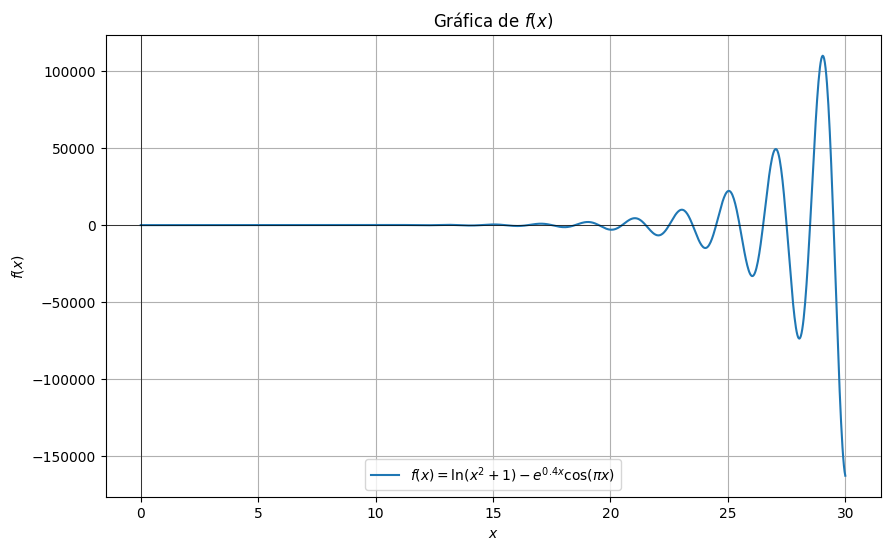

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función f(x)
def f(x):
    return np.log(x**2 + 1) - np.exp(0.4 * x) * np.cos(np.pi * x)

# Crear un rango de valores x
x = np.linspace(0, 30, 1000)  # Considerar un rango amplio para ver varios ceros

# Evaluar la función f en el rango x
y = f(x)

# Graficar la función
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='$f(x) = \ln(x^2+1) - e^{0.4 x} \cos(\pi x)$')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Gráfica de $f(x)$')
plt.legend()
plt.grid(True)
plt.show()


### Use la parte $c)$ para determinar, dentro de $10^{-6}$, el vigesimoquinto cero positivo más pequeño de $f$.

In [9]:
from scipy.optimize import bisect

# Definir una función para encontrar los ceros en un intervalo dado
def find_zeros(f, x_range, num_zeros):
    zeros = []
    x_min, x_max = x_range
    x_vals = np.linspace(x_min, x_max, 1000)

    for i in range(len(x_vals) - 1):
        if f(x_vals[i]) * f(x_vals[i+1]) < 0:
            zero = bisect(f, x_vals[i], x_vals[i+1], xtol=1e-6)
            if zero not in zeros:  # Evitar duplicados
                zeros.append(zero)
        if len(zeros) >= num_zeros:
            break
    return zeros

# Buscar los primeros 25 ceros en un rango amplio
x_range = (0, 100)
num_zeros = 25

# Encontrar los ceros
zeros = find_zeros(f, x_range, num_zeros)

# Imprimir el vigesimoquinto cero positivo
zeros[24]


24.49988669699973